In [248]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import graphviz

# 머신러닝
from sklearn import datasets, svm, neighbors, tree
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import (
    BaggingRegressor, BaggingClassifier, 
    RandomForestClassifier, RandomForestRegressor
)

# 가상의 데이터 생성
- 그림을 그리기 위해서 이렇게 합니다. 
- 실제 데이터들은 입력데이터의 차원이 높다(변수가 많다는 뜻)
    - 그림을 그릴 수 없다. 

## 분류 데이터

In [227]:
# xy, labels = datasets.make_blobs(n_samples=50, n_class, random_state=123)
xy, xy_labels = datasets.make_classification(
    n_samples=50, n_features=2, n_informative=1, n_redundant=0, 
    n_clusters_per_class=1, n_classes=2, random_state=123
)

xyz, xyz_labels = datasets.make_classification(
    n_samples=50, n_features=2, n_informative=2, n_redundant=0, 
    n_clusters_per_class=1, n_classes=3, random_state=123
)

- 입력차원이 2임을 가정한 데이터로 ($x_1, x_2$) 정도로 생각
- 레이블이 2(binary classification)인 데이터와 레이블이 3(multi classifiaction)인 데이터

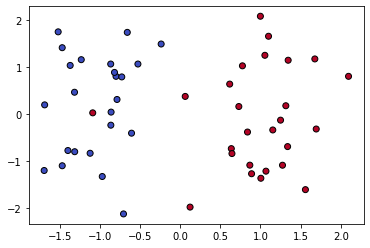

In [228]:
plt.scatter(xy[:,0], xy[:,1], cmap='coolwarm', edgecolors='k', c=xy_labels)
plt.show()

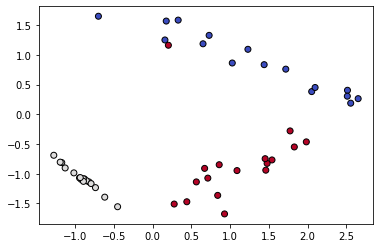

In [229]:
plt.scatter(xyz[:,0], xyz[:,1], cmap='coolwarm', edgecolors='k', c=xyz_labels)
plt.show()

## 회귀 데이터

In [230]:
np.random.seed(0)
X = np.sort(5 * np.random.rand(50, 1), axis=0)
Y = np.cos(np.pi * X).flatten() + np.sin(np.pi * X).flatten() + np.random.rand(len(X))
newX = np.linspace(0, 5, 1000).reshape(1000, 1) # 회귀선을 그리는 용도

In [231]:
print(X.shape, Y.shape, newX.shape)

(50, 1) (50,) (1000, 1)


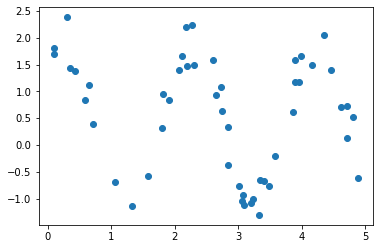

In [232]:
plt.plot(X, Y, 'o')
plt.show()

# Ensemble
- 앙상블
- 하나의 모형을 이용하지 않고, 여러개의 모형을 이용해서 정확도를 높이는 방법
- 주로, 결정트리가 주로 많이 사용이 된다. 
- 어떤 모형이든 사용이 가능

# Bagging
- Bootstrap Aggregating

## 회귀 데이터

### Bootstrapping
- Cross Validation과는 다르게 원본 데이터 셋에서, 중복이 가능한 여러개의 샘플 데이터 셋을 이용한 방법

In [233]:
bagging = []
for _ in range(10):
    idx = [x for x in range(X.shape[0])]
    sampling = np.random.choice(idx, X.shape[0] // 2, replace=False)
    bagging.append(sampling)

In [234]:
bagging

[array([15, 38, 46, 10, 12, 37, 18, 20, 17,  7,  5,  6,  9, 29, 24, 33,  0,
        39,  1, 41, 23, 35, 21, 16, 47]),
 array([ 4, 34, 49,  0, 48,  6, 28, 26, 13, 40, 25, 47, 42, 17, 27, 16,  9,
         7, 30, 41, 14, 46, 21, 39, 19]),
 array([ 9, 44, 10,  4, 46, 21, 23, 39, 13, 48, 26, 45, 19, 31, 14,  6, 43,
        28,  7, 15, 42, 22, 12, 49, 41]),
 array([ 2,  1, 21, 15, 44, 12, 48, 35, 31,  5, 39, 34, 25, 18, 37,  6, 47,
        14, 10, 42,  4, 11, 46, 20, 38]),
 array([19, 48, 14, 38,  5, 40, 21, 11, 39, 42, 20,  0, 12,  2, 33,  4, 31,
        17, 29,  3, 47, 15, 22, 45, 28]),
 array([46, 24, 40,  5, 44, 21, 38, 45, 41, 43, 35, 14, 18, 49, 32,  2, 12,
        42, 26, 39,  6, 31, 11,  8, 13]),
 array([18,  1, 16, 44, 13, 31, 15, 10,  2, 37, 42, 45, 29, 17, 24, 14, 22,
        36, 23, 43, 25, 41, 11, 47,  0]),
 array([40, 42, 34, 21, 48, 18,  1, 43,  5, 38,  7, 11, 46,  0,  8, 10, 24,
        16, 14, 49, 19, 31, 37, 12, 25]),
 array([42, 23, 47, 34, 22,  7, 39, 13,  4,  9, 19, 20, 

### SVR 모형

In [235]:
bagging_predict = []
for idx in bagging:
    train = X[idx]
    test = Y[idx]
    model = svm.SVR(kernel='rbf', C=100, gamma=0.5).fit(train, test)
    predict = model.predict(newX)
    bagging_predict.append(predict)

In [236]:
len(bagging_predict[0]) # 0 ~ 9까지의 10개의 서브샘플셋에서의 예측값

1000

In [237]:
bagging_predict[1] # 0 ~ 9까지의 10개의 서브샘플셋에서의 예측값

array([ 1.80236665e+00,  1.81093309e+00,  1.81923652e+00,  1.82727523e+00,
        1.83504750e+00,  1.84255169e+00,  1.84978619e+00,  1.85674943e+00,
        1.86343989e+00,  1.86985609e+00,  1.87599660e+00,  1.88186003e+00,
        1.88744505e+00,  1.89275035e+00,  1.89777471e+00,  1.90251692e+00,
        1.90697583e+00,  1.91115034e+00,  1.91503940e+00,  1.91864201e+00,
        1.92195723e+00,  1.92498415e+00,  1.92772192e+00,  1.93016974e+00,
        1.93232688e+00,  1.93419263e+00,  1.93576637e+00,  1.93704749e+00,
        1.93803546e+00,  1.93872982e+00,  1.93913012e+00,  1.93923600e+00,
        1.93904715e+00,  1.93856329e+00,  1.93778422e+00,  1.93670980e+00,
        1.93533992e+00,  1.93367455e+00,  1.93171371e+00,  1.92945746e+00,
        1.92690595e+00,  1.92405935e+00,  1.92091791e+00,  1.91748194e+00,
        1.91375179e+00,  1.90972789e+00,  1.90541071e+00,  1.90080078e+00,
        1.89589870e+00,  1.89070512e+00,  1.88522074e+00,  1.87944633e+00,
        1.87338273e+00,  

In [238]:
bagging_mean_predict = []
for i in range(newX.shape[0]):
    total = []
    for bag in bagging_predict:
        total.append(bag[i])
    # print(np.mean(total))
    bagging_mean_predict.append(np.mean(total))

In [239]:
print(
    bagging_predict[0][0], bagging_predict[1][0], bagging_predict[2][0],
    bagging_predict[3][0], bagging_predict[4][0], bagging_predict[5][0],
    bagging_predict[6][0], bagging_predict[7][0], bagging_predict[8][0],
    bagging_predict[9][0]
)

print(
    bagging_predict[0][0]+bagging_predict[1][0]+bagging_predict[2][0]+
    bagging_predict[3][0]+bagging_predict[4][0]+bagging_predict[5][0]+
    bagging_predict[6][0]+bagging_predict[7][0]+bagging_predict[8][0]+
    bagging_predict[9][0]
)

print(
    (bagging_predict[0][0]+bagging_predict[1][0]+bagging_predict[2][0]+
    bagging_predict[3][0]+bagging_predict[4][0]+bagging_predict[5][0]+
    bagging_predict[6][0]+bagging_predict[7][0]+bagging_predict[8][0]+
    bagging_predict[9][0]) / 10
)

1.6586509687366882 1.80236665342898 1.8631460929145454 1.6431146316041598 1.9334473326253825 2.9471796879451193 1.3807331136282592 1.7524961091080549 1.3150873928485987 1.8291664965091112
18.1253884793489
1.8125388479348898


In [240]:
bagging_mean_predict[:5]

[1.8125388479348898,
 1.8203644343241119,
 1.8279527274163059,
 1.8353021169699797,
 1.8424110285454645]

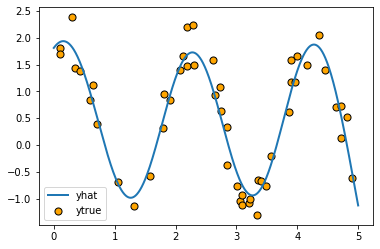

In [241]:
plt.scatter(X, Y, s=50, edgecolors='black', c='orange', label='ytrue')
plt.plot(newX, bagging_mean_predict, label='yhat', linewidth=2)
plt.legend()
plt.show()

### Decision Tree + Bagging

In [242]:
tree_model = tree.DecisionTreeRegressor(max_depth=5)
bagging_model = BaggingRegressor(
    base_estimator=tree_model,
    n_estimators= 10, #10번 샘플링
    verbose= 1 # 과정 출력
).fit(X, Y) # 라이브러리 내에서 부트스트래핑이 진행되므로, 원본 데이터를 그대로 입력

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


In [243]:
yhat = bagging_model.predict(newX)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


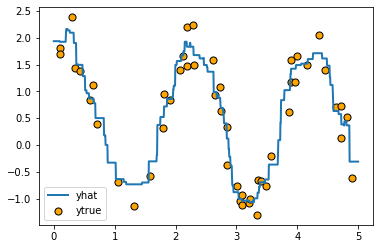

In [244]:
plt.scatter(X, Y, s=50, edgecolors='black', c='orange', label='ytrue')
plt.plot(newX, yhat, label='yhat', linewidth=2)
plt.legend()
plt.show()

## 분류 데이터

### Decision Tree + bagging

In [245]:
tree_model = tree.DecisionTreeClassifier(criterion='entropy', max_depth=2)
bagging_model = BaggingClassifier(
    base_estimator=tree_model,
    n_estimators= 10, #10번 샘플링
    verbose= 1 # 과정 출력
).fit(xyz, xyz_labels) # 라이브러리 내에서 부트스트래핑이 진행되므로, 원본 데이터를 그대로 입력

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


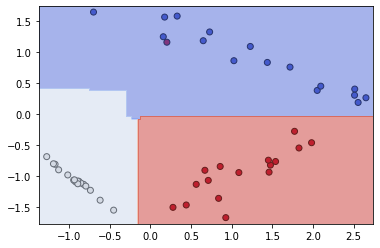

In [246]:
xx, yy = np.meshgrid(
    np.arange(xyz[:,0].min() - 0.1, xyz[:,0].max() + 0.1, 0.01), 
    np.arange(xyz[:,1].min() - 0.1, xyz[:,1].max() + 0.1 , 0.01)
)

yhat = bagging_model.predict(np.c_[xx.flatten(), yy.flatten()])

plt.scatter(xyz[:,0], xyz[:,1], cmap='coolwarm', edgecolors='k', c=xyz_labels)
plt.contourf(xx, yy, yhat.reshape(xx.shape), cmap='coolwarm', alpha=0.5)
plt.show()

## RandomForest
- Decision Tree에 Bagging의 아이디어를 접목한 알고리즘

In [258]:
model = RandomForestRegressor( 
    n_estimators= 500, 
    # max_depth=5,
    random_state=123
).fit(X, Y)

In [259]:
yhat = model.predict(newX)

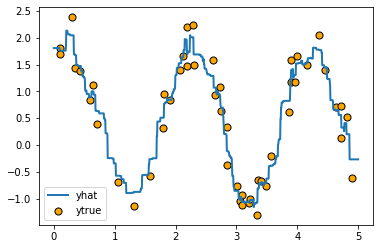

In [260]:
plt.scatter(X, Y, s=50, edgecolors='black', c='orange', label='ytrue')
plt.plot(newX, yhat, label='yhat', linewidth=2)
plt.legend()
plt.show()

In [261]:
model = RandomForestClassifier(
    n_estimators= 500, 
    random_state=123
).fit(xyz, xyz_labels)

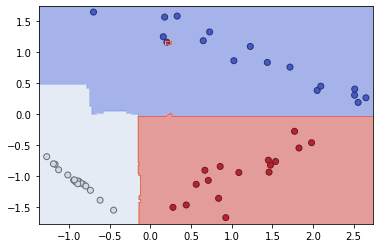

In [262]:
xx, yy = np.meshgrid(
    np.arange(xyz[:,0].min() - 0.1, xyz[:,0].max() + 0.1, 0.01), 
    np.arange(xyz[:,1].min() - 0.1, xyz[:,1].max() + 0.1 , 0.01)
)

yhat = model.predict(np.c_[xx.flatten(), yy.flatten()])

plt.scatter(xyz[:,0], xyz[:,1], cmap='coolwarm', edgecolors='k', c=xyz_labels)
plt.contourf(xx, yy, yhat.reshape(xx.shape), cmap='coolwarm', alpha=0.5)
plt.show()

# Boosting